### Maize は　OpenEyey社のROCSもサポートしています。
- 利用にはライセンスが必要です。アカデミックライセンスもありますが、企業で利用する場合は有償なのでこのコードは参考までに。
- Queryは[セレコキシブ](https://www.rcsb.org/ligand/S58)を使いました

In [1]:
from openeye import oechem
from openeye import oeshape
from maize.steps.mai.docking import ROCS
from maize.steps.mai.molecule import Mol2Isomers, Smiles2Molecules
from maize.steps.io import LoadData, LogResult, Return, Void
from maize.core.interface import MultiInput, Parameter, Path, Input, Output
from maize.core.node import Node
from maize.core.workflow import Workflow
from maize.utilities.chem import IsomerCollection
import numpy as np
from pathlib import Path
from numpy.typing import NDArray
from string import Template


In [2]:
import os, sys

In [3]:
flow = Workflow(name='rocs', level='info', cleanup_temp=True)

In [4]:
flow.config.update(Path("/home/iwatobipen/.config/maize.toml"))

In [5]:
load = flow.add(LoadData[list[str]])
smi2mol = flow.add(Smiles2Molecules)
rocs = flow.add(ROCS)
retu = flow.add(Return[list[IsomerCollection]], name='retmol')

#log = flow.add(Void)

load.data.set(
    ["c1cc(ccc1c2cc(nn2c3ccc(cc3)S(=O)(=O)N)C(F)(F)F)Br",
    "c1cc(ccc1c2cc(nn2c3ccc(cc3)S(=O)(=O)N)C(F)(F)F)Cl",
    "c1cc(ccc1c2cc(nn2c3ccc(cc3)S(=O)(=O)N)CF)Cl",
    "CCCCCC"]
)

In [6]:
flow.connect(load.out, smi2mol.inp)
flow.connect(smi2mol.out, rocs.inp)
flow.connect(rocs.out, retu.inp)


In [8]:
rocs.query.set('../data/S58.sq')

In [9]:
flow.check()

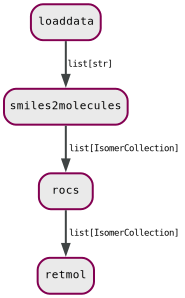

In [10]:
flow.visualize()

In [11]:
flow.execute()

2024-10-12 22:17:56,182 |     INFO |             rocs | 
              ___           ___                       ___           ___
             /\__\         /\  \          ___        /\  \         /\  \
            /::|  |       /::\  \        /\  \       \:\  \       /::\  \
           /:|:|  |      /:/\:\  \       \:\  \       \:\  \     /:/\:\  \
          /:/|:|__|__   /::\~\:\  \      /::\__\       \:\  \   /::\~\:\  \
         /:/ |::::\__\ /:/\:\ \:\__\  __/:/\/__/ _______\:\__\ /:/\:\ \:\__\
         \/__/~~/:/  / \/__\:\/:/  / /\/:/  /    \::::::::/__/ \:\~\:\ \/__/
               /:/  /       \::/  /  \::/__/      \:\~~\~~      \:\ \:\__\
              /:/  /        /:/  /    \:\__\       \:\  \        \:\ \/__/
             /:/  /        /:/  /      \/__/        \:\__\        \:\__\
             \/__/         \/__/                     \/__/         \/__/


2024-10-12 22:17:56,183 |     INFO |             rocs | Starting Maize version 0.8.3 (c) AstraZeneca 2024
2024-10-12 22:1

2024-10-12 22:17:59,520 |     INFO |             rocs | Shape matched 'NSQNZEUFHPTJME-QVUQFMIFNA-N' with a score of 0.6343627572059631
2024-10-12 22:17:59,603 |     INFO |             rocs | Shape matched 'NQFORQYHJUQDES-SDRQFZCRNA-N' with a score of 0.623847484588623
2024-10-12 22:17:59,639 |     INFO |             rocs | Shape matched 'VLKZOEOYAKHREP-UHFFFAOYNA-N' with a score of 0.10418540984392166

2024-10-12 22:17:59,642 |     INFO |             rocs | Workflow status
                                   | smiles2molecules | COMPLETED
                                   |             rocs | WAITING_FOR_OUTPUT
                                   |           retmol | WAITING_FOR_INPUT
                                   |         loaddata | COMPLETED
2024-10-12 22:17:59,648 |     INFO |             rocs | Node 'retmol' finished (3/4)
2024-10-12 22:18:00,173 |     INFO |             rocs | Node 'rocs' finished (4/4)
2024-10-12 22:18:00,675 |     INFO |             rocs | Execution complet

In [12]:
resmols = []
for mol in retu.get():
    resmols.append(mol)

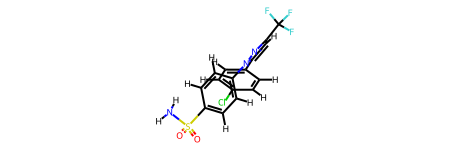

In [20]:
resmols[1].molecules[0]._molecule

In [20]:
for idx, mol in enumerate(resmols):
    mol.to_sdf(Path(f"{idx}_mol.sdf"))

IsomerCollection('c1cc(ccc1c2cc(nn2c3ccc(cc3)S(=O)(=O)N)C(F)(F)F)Br', n_isomers=1, best_score=0.6029)

In [22]:
from openeye import oechem
from openeye import oeshape
from maize.steps.mai.docking import ROCS
from maize.steps.mai.molecule import Mol2Isomers, Smiles2Molecules
from maize.steps.mai.molecule import LoadMolecule, LoadSmiles # LoadMolecule reads SDF/MAE LoadSmiles reads smi
from maize.steps.io import LoadData, LoadFile, LogResult, Return, Void
from maize.core.interface import MultiInput, Parameter, Path, Input, Output
from maize.core.node import Node
from maize.core.workflow import Workflow
from maize.utilities.chem import IsomerCollection
import numpy as np
from pathlib import Path
from numpy.typing import NDArray
from string import Template


In [25]:
flow2 = Workflow(name='rocs with smi file', cleanup_temp=True)

In [26]:
loadsmi = flow2.add(LoadSmiles)
smi2mol = flow2.add(Smiles2Molecules)
rocs = flow2.add(ROCS)
retu = flow2.add(Return[list[IsomerCollection]], name='retmol2')


In [27]:
loadsmi.path.set(Path("../data//test.smi"))
rocs.query.set(Path("../data/S58.sq"))


In [28]:
flow2.connect(loadsmi.out, smi2mol.inp)
flow2.connect(smi2mol.out, rocs.inp)
flow2.connect(rocs.out, retu.inp)


In [29]:
flow2.check()

In [30]:
flow2.execute()

2024-10-12 22:24:09,749 |     INFO | rocs with smi file | 
              ___           ___                       ___           ___
             /\__\         /\  \          ___        /\  \         /\  \
            /::|  |       /::\  \        /\  \       \:\  \       /::\  \
           /:|:|  |      /:/\:\  \       \:\  \       \:\  \     /:/\:\  \
          /:/|:|__|__   /::\~\:\  \      /::\__\       \:\  \   /::\~\:\  \
         /:/ |::::\__\ /:/\:\ \:\__\  __/:/\/__/ _______\:\__\ /:/\:\ \:\__\
         \/__/~~/:/  / \/__\:\/:/  / /\/:/  /    \::::::::/__/ \:\~\:\ \/__/
               /:/  /       \::/  /  \::/__/      \:\~~\~~      \:\ \:\__\
              /:/  /        /:/  /    \:\__\       \:\  \        \:\ \/__/
             /:/  /        /:/  /      \/__/        \:\__\        \:\__\
             \/__/         \/__/                     \/__/         \/__/


2024-10-12 22:24:09,750 |     INFO | rocs with smi file | Starting Maize version 0.8.3 (c) AstraZeneca 2024
2024-10-12 

2024-10-12 22:24:13,503 |     INFO |             rocs | Shape matched 'OYZKFVIVPRQRQQ-QVUQFMIFNA-N' with a score of 0.6029260158538818
2024-10-12 22:24:13,563 |     INFO |             rocs | Shape matched 'NSQNZEUFHPTJME-QVUQFMIFNA-N' with a score of 0.6343627572059631
2024-10-12 22:24:13,645 |     INFO |             rocs | Shape matched 'NQFORQYHJUQDES-SDRQFZCRNA-N' with a score of 0.623847484588623
2024-10-12 22:24:13,681 |     INFO |             rocs | Shape matched 'VLKZOEOYAKHREP-UHFFFAOYNA-N' with a score of 0.10418540984392166

2024-10-12 22:24:13,685 |     INFO | rocs with smi file | Workflow status
                                   |       loadsmiles | COMPLETED
                                   |             rocs | WAITING_FOR_OUTPUT
                                   | smiles2molecules | COMPLETED
                                   |          retmol2 | WAITING_FOR_INPUT
2024-10-12 22:24:13,690 |     INFO | rocs with smi file | Node 'retmol2' finished (3/4)
2024-10-12 22:24

In [21]:
resmols = []
for mol in retu.get():
    resmols.append(mol)
for idx, mol in enumerate(resmols):
    mol.to_sdf(Path(f"{idx}_mol.sdf"))

In [25]:
m=dataset[1]

In [33]:
m

IsomerCollection('c1cc(ccc1c2cc(nn2c3ccc(cc3)S(=O)(=O)N)C(F)(F)F)Cl', n_isomers=1, best_score=0.6344)

In [34]:
mol=m.molecules[0]

In [36]:
mol.scores

array([0.63436273])